# Homework 5

## *Part 1*

The following model is given:

\begin{align*}
A &\sim \mathcal{N}(A;0,1.2)\\
B &\sim \mathcal{IG}(R;0.4,250)\\
x_k|x_{k-1},A,R &\sim \mathcal{N}(x_k;Ax_{k-1},R)\\
x_0 &=1\\
x_1 &=-6
\end{align*}

### 1)
**Graphical Model**

<img src="graphical_model.png\" style="width: 300px;\"> 

**Factor Graph** 

<img src="factor_graph.png\" style="width: 300px;\">

### 2) 
The joint posterior distribution can be achieved by:
\begin{align*}
\phi & = p(A,R,x_k=\hat{x_k} | x_{k-1}=\hat{x_{k-1}}) \propto p(x_k | x_{k-1},A,R)p(A)p(R)\\
& = \mathcal{N}(x_k;Ax_{k-1},R)\mathcal{N}(A;0,1.2)\mathcal{IG}(R;0.4,250\\
& \propto \exp(-\frac{1}{2}\frac{x_k^2}{R}+x_{k}x_{k-1}\frac{A}{R}-\frac{1}{2}\frac{x_{k-1}^2A^2}{R}-\frac{1}{2}\log2\pi R)\\
& \quad \exp(-\frac{1}{2}\frac{A^2}{1.2}-\frac{1}{2}\log|2\pi 1.2|)\\
& \quad \exp(-1.4\log R-\frac{250}{R}-\log \Gamma(0.4)+0.4\log250)
\end{align*}

Assigning terms to individual factors:

\begin{align*}
\log\phi & = -\frac{1}{2}\frac{x_k^2}{R}+x_{k}x_{k-1}\frac{A}{R}-\frac{1}{2}\frac{x_{k-1}^2A^2}{R}-\frac{1}{2}\log R -\frac{1}{2}\frac{A^2}{1.2}-(1.4)\log R-\frac{250}{R}\\
\end{align*}

\begin{align*}
q(A)&=\exp(-\frac{1}{2}\frac{A^2}{1.2})\\
q(R)&=\exp\left(-1.9\log R -(250+\frac{x_k^2}{2}+\frac{1}{R})\right)\\
q(x_{k-1},x_k) &= \exp\left(x_{k-1}x_k\frac{A}{R}-\frac{1}{2}\frac{x_{k-1}^2A^2}{R}\right)
\end{align*}



### 3)
\begin{align} 
p(A|R,x_{k-1},x_k) &\propto exp\big{(}-\frac{1}{2}\frac{A^2}{P}+x_{k-1}x_{k}\frac{A}{R}-\frac{1}{2}\frac{x_{k-1}^2A^2}{R}\big{)}\\
p(R|A,x_{k-1},x_{k}) &\propto exp\big{(}-(1.9)\log R-\big{(}\frac{0.4}{\beta}+\frac{1}{2}x_k^2\big{)}\frac{1}{R}+x_{k-1}x_k\frac{A}{R}-\frac{1}{2}\frac{x_{k-1}^2A^2}{R}\big{)}\\
\end{align}

### 4)

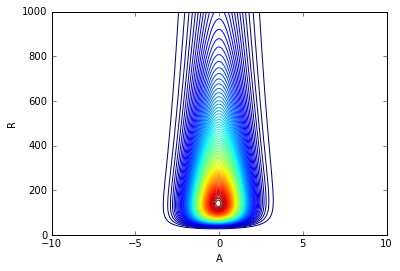

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sps

p=1.2
nu=0.4
x_0=1
x_1=-6
b=0.0016

A = np.linspace(-10,10,200).tolist()
R = np.linspace(1,1000,200).tolist()
v=[]
for r in R:
    v1=[]
    for a in A:
        x = -(x_1**2)/(2*r) + x_0*x_1*a/r -((a*x_0)**2)/(2*r) - np.log(2*np.pi*r)/2
        y = -(a**2)/(2*p) - np.log(np.absolute(2*np.pi*p))/2
        z = -(nu+1)*np.log(r) - (nu/b)*(1/r) - np.log(sps.gamma(nu)) + nu*np.log(nu/b)
        
        v1.append(np.exp(x+y+z))
    v.append(v1)
        
v=np.asarray(v)        
plt.contour(A,R,v,100)
plt.xlabel('A')
plt.ylabel('R')
plt.show()
        